In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Embedding, Dropout, LSTM
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils

# Task1

In [3]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
Ft = pd.get_dummies(df['Fuel Type'],drop_first=True,prefix='Fuel')
df = df.drop(['Fuel Type'],axis=1)
df = pd.concat([df,Ft],axis=1)
Tr = pd.get_dummies(df['Transmission'],drop_first=True)
df = df.drop(['Transmission'],axis=1)
df = pd.concat([df,Tr],axis=1)

In [6]:
import category_encoders as ce
X = df.drop(['CO2 Emissions(g/km)','Fuel Consumption Comb (mpg)'],axis=1)
y = df['CO2 Emissions(g/km)']


x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
cat_cols = ['Make','Model','Vehicle Class']
target_enc = ce.CatBoostEncoder(cols = cat_cols)
target_enc.fit(x_train[cat_cols],y_train)

CatBoostEncoder(cols=['Make', 'Model', 'Vehicle Class'])

In [7]:
train_enc = target_enc.transform(x_train[cat_cols])
test_enc = target_enc.transform(x_test[cat_cols])

x_train = x_train.drop(['Make','Model','Vehicle Class'],axis=1)
x_test = x_test.drop(['Make','Model','Vehicle Class'],axis=1)
x_train = pd.concat([x_train,train_enc],axis=1)
x_test = pd.concat([x_test,test_enc],axis=1)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(y_test.shape[1], activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
140/140 [==============================] - 5s 5ms/step - loss: 0.6132 - accuracy: 0.8314
Epoch 2/100
140/140 [==============================] - 1s 5ms/step - loss: 0.3680 - accuracy: 0.8601
Epoch 3/100
140/140 [==============================] - 1s 5ms/step - loss: 0.3279 - accuracy: 0.8682
Epoch 4/100
140/140 [==============================] - 1s 5ms/step - loss: 0.3043 - accuracy: 0.8792
Epoch 5/100
140/140 [==============================] - 1s 6ms/step - loss: 0.3000 - accuracy: 0.8806
Epoch 6/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2886 - accuracy: 0.8857
Epoch 7/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2751 - accuracy: 0.8938
Epoch 8/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2597 - accuracy: 0.8981: 0s - loss: 0.2563 - accu
Epoch 9/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2578 - accuracy: 0.9003
Epoch 10/100
140/140 [==============================] - 1s 5ms/st

140/140 [==============================] - 1s 4ms/step - loss: 0.0640 - accuracy: 0.9791
Epoch 79/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0590 - accuracy: 0.9807
Epoch 80/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0875 - accuracy: 0.9749
Epoch 81/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9818
Epoch 82/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0517 - accuracy: 0.9832
Epoch 83/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0698 - accuracy: 0.9793
Epoch 84/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 85/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0649 - accuracy: 0.9809
Epoch 86/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0695 - accuracy: 0.9789
Epoch 87/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0523 - accuracy: 

In [42]:
pred_train = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}\n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test = model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}\n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

Accuracy on training data: 0.8928571343421936
Error on training data: 0.10714286583578064
Accuracy on test data: 0.8500000238418579
Error on test data: 0.1499999761581421


# Task2

In [65]:
from tensorflow import keras

(train_features, train_labels), (test_features, test_labels) = keras.datasets.fashion_mnist.load_data()

In [66]:
print(train_features.shape)
print(test_features.shape)

(60000, 28, 28)
(10000, 28, 28)


In [67]:
# Normalize pixel values to be between 0 and 1
train_features = train_features.astype('float32') / 255
test_features = test_features.astype('float32') / 255

In [68]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

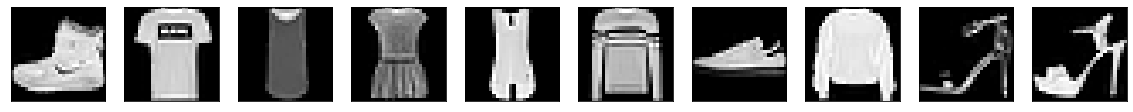

In [69]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_features[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [71]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU

model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])



NameError: name 'layers' is not defined

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [54]:
model.fit(train_features, train_labels, validation_data=(test_features, test_labels), batch_size=64, epochs=20)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [ ]:
model.summary()

In [ ]:
scores = model.evaluate(test_features, test_labels, verbose=0)
print(f'Accuracy: {scores[1]}')

In [ ]:
print(f'Loss: {scores[0]}')

# Task 3

In [17]:
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=["label", 'message'])
df.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


C:\Users\ellun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


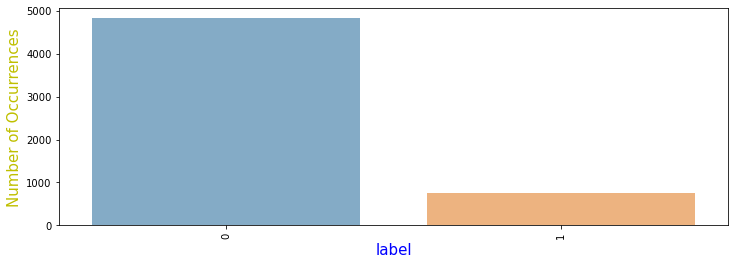

In [32]:
cnt_pro = df['label'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.6)
plt.ylabel('Number of Occurrences', fontsize=15, color = 'y')
plt.xlabel('label', fontsize=15, color = 'b')
plt.xticks(rotation=90)
plt.show();

In [19]:
labels = sorted(list(set(df.label)))
for i in range(len(labels)):
    df.label[df.label == labels[i]] = i
labels_map = {i: labels[i] for i in range(len(labels))}
labels_map

{0: 'ham', 1: 'spam'}

In [20]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
y_train = np_utils.to_categorical(y_train, len(labels))
y_test = np_utils.to_categorical(y_test, len(labels))

In [21]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(X_train)

In [22]:
x_train = tokenizer.texts_to_sequences(X_train)
x_train = pad_sequences(x_train, maxlen=30)

x_test = tokenizer.texts_to_sequences(X_test)
x_test = pad_sequences(x_test, maxlen=30)

In [23]:
model = Sequential()

model.add(Embedding(100, 32, input_length=30))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
140/140 [==============================] - 23s 64ms/step - loss: 0.2711 - accuracy: 0.9005 - val_loss: 0.0950 - val_accuracy: 0.9749
Epoch 2/20
140/140 [==============================] - 4s 29ms/step - loss: 0.1132 - accuracy: 0.9614 - val_loss: 0.1212 - val_accuracy: 0.9677
Epoch 3/20
140/140 [==============================] - 4s 31ms/step - loss: 0.1043 - accuracy: 0.9652 - val_loss: 0.0897 - val_accuracy: 0.9749
Epoch 4/20
140/140 [==============================] - 4s 32ms/step - loss: 0.0959 - accuracy: 0.9665 - val_loss: 0.1097 - val_accuracy: 0.9668
Epoch 5/20
140/140 [==============================] - 4s 31ms/step - loss: 0.0977 - accuracy: 0.9677 - val_loss: 0.0826 - val_accuracy: 0.9749
Epoch 6/20
140/140 [==============================] - 4s 32ms/step - loss: 0.0936 - accuracy: 0.9692 - val_loss: 0.0832 - val_accuracy: 0.9758
Epoch 7/20
140/140 [==============================] - 4s 32ms/step - loss: 0.0904 - accuracy: 0.9681 - val_loss: 0.0873 - val_accuracy: 0.973

In [26]:
scores = model.evaluate(x_test, y_test)
print('Accuracy:', scores[1])

35/35 [==============================] - 1s 10ms/step - loss: 0.0845 - accuracy: 0.9731
Accuracy: 0.9730700254440308


In [27]:
print('Loss: ', scores[0])

Loss:  0.08454565703868866
